# Taller modelos lineales
## Nancy Alejandra Vinazco Morales

# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [ ]:
income.shape

(32561, 15)

# Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



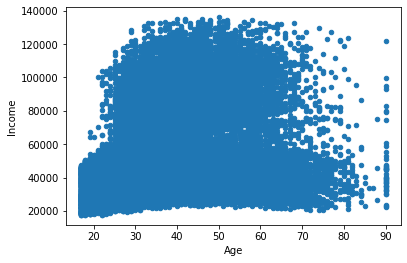

In [ ]:
income.plot(x='Age', y='Income', kind='scatter')

A partir del grafico de dispersión anterior, en donde miramos la relación de la edad frente al Ingreso, se puede decir que no se aprecia alguna correlación entre las variables. 

**Normalización**

Text(0, 0.5, 'Income')

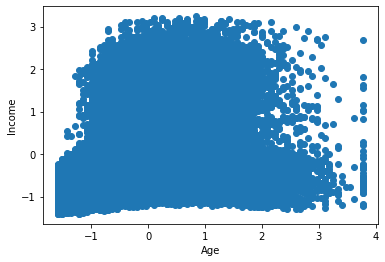

In [165]:
y = income["Income"].values
X = income["Age"].values

y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/y_std
X = (X - X_mean)/X_std

plt.scatter(X,y)
plt.xlabel("Age")
plt.ylabel("Income")

# Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

**Regresión Lineal**

In [130]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
print(X_)

[[ 1.          0.03067056]
 [ 1.          0.83710898]
 [ 1.         -0.04264203]
 ...
 [ 1.          1.42360965]
 [ 1.         -1.21564337]
 [ 1.          0.98373415]]


In [131]:
# import
from sklearn.linear_model import LinearRegression

In [132]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [133]:
# Fit
linreg.fit(X_, y)
linreg.coef_

array([8.39066006e-17, 2.90408298e-01])

## $$ h_\beta(x) = \beta_0 + \beta_1x_1 $$

- $h_\beta(x)$ - $Income$
- $\beta_0$ = 0
- $\beta_1$ = 0.2904083 para $Age$ (la primera variable)

Para las variables estandarizadas, un aumento del 1 por ciento en la edad, el Ingreso aumenta en un **29,04** por ciento 


In [134]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = LinearRegression()
clf3 = LinearRegression()
clf4 = LinearRegression()

# Predicciones

Predección del INGRESO cuando la EDAD es de 30



In [135]:
x = np.array([30])


In [136]:
clf1.fit(income[['Age']], income['Income'])
clf1.predict(x.reshape(1, -1))

array([48803.11784304])

De acuerdo al modelo, cuando tenemos $Age$ = $30$  el ingreso va a ser de \$ $48803.12$

Predección del INGRESO cuando la EDAD es de 40

In [163]:
x = np.array([40])


In [164]:
clf2.fit(income[['Age']], income['Income'])
clf2.predict(x.reshape(1, -1))

array([54224.79441376])

De acuerdo al modelo, cuando tenemos $Age$ = $40$  el ingreso va a ser de \$ $54224.8$


# Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [139]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


### Hipótesis:

* Previamente:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 $$

donde $x_1$ = Age

* Ahora:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
donde $x_2$ = $Age^2$

In [156]:
X = income[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]])

In [160]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [161]:
X[0:5]

array([[ 0.03067056, -0.13027593],
       [ 0.83710898,  0.70006807],
       [-0.04264203, -0.19558388],
       [ 1.05704673,  0.96214804],
       [-0.77576787, -0.75536635]])

In [162]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

Ecuaciones OLS 

In [166]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([ 4.00789036e-17,  1.67751068e+00, -1.41415206e+00])

# Predicciones

Predección del INGRESO cuando la EDAD es de 30



In [167]:
x = np.array([30., 30.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        , -0.6291427 , -0.65698034]])

In [168]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([-0.12632349])

In [169]:
y_pred = y_pred * y_std + y_mean
y_pred

array([50238.96390027])

De acuerdo al modelo, cuando tenemos $Age$ = $30$ y $Age2$ = $30^2$ el ingreso va a ser de \$ $50238.96390027$

Usando Sklearn

In [170]:
clf1.fit(income[['Age', 'Age2']], income['Income'])
clf1.predict(x.reshape(1, -1))

array([50238.96390027])

Predección del INGRESO cuando la EDAD es de 40

In [171]:
x = np.array([40., 40.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        ,  0.10398314, -0.06327166]])

In [172]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([0.26390858])

In [173]:
y_pred = y_pred * y_std + y_mean
y_pred

array([60176.27802692])

De acuerdo al modelo, cuando tenemos $Age$ = $40$ y $Age2$ = $40^2$  el ingreso va a ser de \$  $60176.27802692$

Usando Sklearn

In [174]:
clf2.fit(income[['Age', 'Age2']], income['Income'])
clf2.predict(x.reshape(1, -1))

array([60176.27802692])

# Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


Para predecir la variable **Income** tendre en cuenta las variables **Hours per week** y **Capital Gain**, pues más adelante se vera que tanto se afecta la variable **Income**  si se incrementa en una unidad o un 1% estas dos variables dejando los años 30 y 40.  

In [176]:
X = income[['Age', 'Hours per week', 'Capital Gain']].values
X[0:5]

array([[  39,   40, 2174],
       [  50,   13,    0],
       [  38,   40,    0],
       [  53,   40,    0],
       [  28,   40,    0]])

In [177]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676,   40.43745585, 1077.64884371]),
 array([  13.64022309,   12.34723908, 7385.17867695]))

In [178]:
X[0:5]

array([[ 0.03067056, -0.03542945,  0.1484529 ],
       [ 0.83710898, -2.22215312, -0.14592048],
       [-0.04264203, -0.03542945, -0.14592048],
       [ 1.05704673, -0.03542945, -0.14592048],
       [-0.77576787, -0.03542945, -0.14592048]])

In [179]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.03542945,  0.1484529 ],
       [ 1.        ,  0.83710898, -2.22215312, -0.14592048],
       [ 1.        , -0.04264203, -0.03542945, -0.14592048],
       [ 1.        ,  1.05704673, -0.03542945, -0.14592048],
       [ 1.        , -0.77576787, -0.03542945, -0.14592048]])

In [180]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([1.45524772e-16, 2.59484826e-01, 2.52411413e-01, 1.74687282e-01])

El modelo es el siguiente:
## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3$$

- $h_\beta(x)$ - **Income**
- $\beta_0$ $\thickapprox$ 0 
- $\beta_1$ = $0.2594$ para $x_1$ ($Age$ estandarizada)
- $\beta_2$ = $0.2524$ para $x_2$ ($Hours \hspace{3mm} per \hspace{3mm}week$  estandarizada)
- $\beta_3$ = $0.17468$ para $x_3$ ($Capital \hspace{3mm} Gain$  estandarizada)

Podemos ver que las tres variables aportan al incremento positivo de la variable respuesta $ Income$, si se incrementan en una unidad $Income$ también aumenta.  

Prediccion del ingreso cuando **Age** es $30$, **Hours per week** son $40$ y **Capital Gain** es $2000$


In [185]:
x = np.array([30., 40.,2000.])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_


array([[ 1.        , -0.6291427 , -0.03542945,  0.12489219]])

In [186]:
y_pred = lr_h(betas_ols, x_)
y_pred


array([-0.1503787])

In [187]:
y_pred = y_pred * y_std + y_mean
y_pred

array([49626.39453341])

Prediccion del ingreso cuando **Age** es $40$, **Hours 
per week** son $40$ y **Capital Gain** es $2000$


In [188]:
x = np.array([40., 40.,2000.])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_


array([[ 1.        ,  0.10398314, -0.03542945,  0.12489219]])

In [189]:
y_pred = lr_h(betas_ols, x_)
y_pred


array([0.03985633])

In [190]:
y_pred = y_pred * y_std + y_mean
y_pred

array([54470.75611018])

## Comparación de las predicciones segun las variables independientes tenidas en cuenta  

| Modelo (variable/s)           | Age = 30 | Age = 40|
|--------------------------------|----------|---------|
| Age                       | 48803.13 | 54224.8 |
| Age y Age2 |50238.9 |60176.3|
| Age, Hours = 40 & Capital = 2000|49626.4|54470.7|

- Se puede apreciar que teniendo en cuenta las variables **Age**, **Hours per week** y **Capital Gain** se predice un valor mayor de **Income** a que si solo se tuviera en cuenta la variable **Age**

#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [ ]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.5

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn.



# Ejercicio 4.6
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


# Ejercicio 4.7

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




# Ejercicio 4.8

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.
